### Nonlinear Dimensionality Reduction

Jay Urbain, PhD

#### Objectives:    
-Students can explain commonly used nonlinear manifold learning techniques: kernel PCA, Isomap, LLE, and variants of LLE (e.g. MLLE)

-Students can explain the differences between these techniques

-Students can connect kernel PCA to classical (linear) PCA and understand how the former is a generalization of the latter

-Students can apply these techniques to a dataset

#### References

1. Ali Ghodsi, Dimensionality ReductionA Short Tutorial, 2006.   
https://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/readings/tutorial_stat890.pdf

2. Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models.     
http://arxiv.org/abs/1207.3538

3. Q. Wang. Kernel principal component analysis and its applications in face recognition and active shape models. CoRR, abs/1207.3538, 2012.

4. B. Scholkopf, A. Smola, and K.-R. Muller. Kernel principal component analysis. pages 583–588, 1997.

5. B. Scholkopf, A. Smola, and K.-R. Muller. Nonlinear component analysis as a kernel eigenvalue problem. Neural computation, 10(5):1299–1319, 1998.

6. S. T. Roweis and L. K. Saul. Nonlinear dimensionality reduction by locally linear embedding. Science, 290(5500):2323–2326, 2000.

7. Sebastian Raschka, Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA    
https://sebastianraschka.com/Articles/2014_kernel_pca.html

8. Wikipedia - Kernel PCA  
https://en.wikipedia.org/wiki/Kernel_principal_component_analysis

9. Lecture - Kernel PCA   
http://fourier.eng.hmc.edu/e161/lectures/kernelPCA/node4.html

10. ML | Introduction to Kernel PCA  
https://www.geeksforgeeks.org/ml-introduction-to-kernel-pca/

11. Rita Osadchy, Lecture: Kernel PCA
http://www.cs.haifa.ac.il/~rita/uml_course/lectures/KPCA.pdf

12. Vanderplas et al, AstroML: Machine Learning and Data Mining for Astronomy, 2012.         
http://www.astroml.org/

13. Jake VanderPlas, Python Data Science Handbook  
https://jakevdp.github.io/PythonDataScienceHandbook/



### Scikit-learn RBF Kernel PCA

There is an implementation of `KernelPCA` in Scikit-learn. 

Generate non-linear dataset.

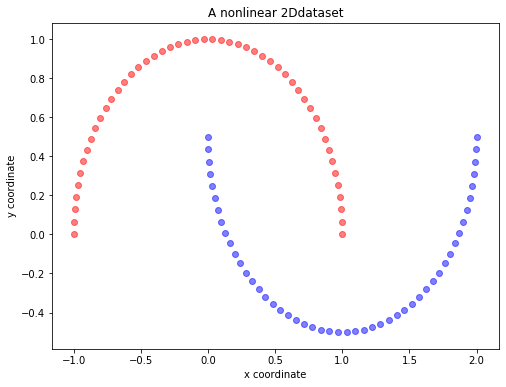

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib as mpl


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()


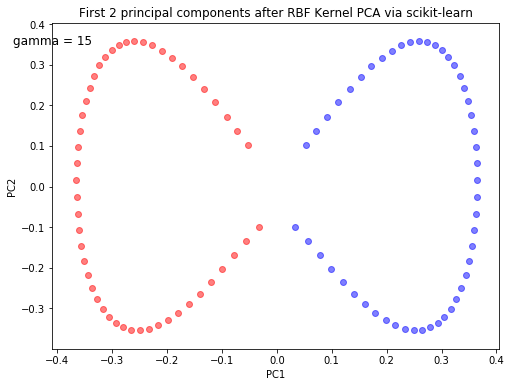

In [2]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

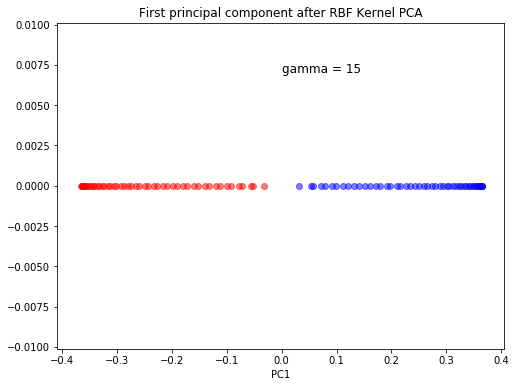

In [3]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.text(-0.00, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

#### Concentric circles

Below is a classic case of 2 concentric circles with random noise produced by Scikit-learn’s `make_circles`.

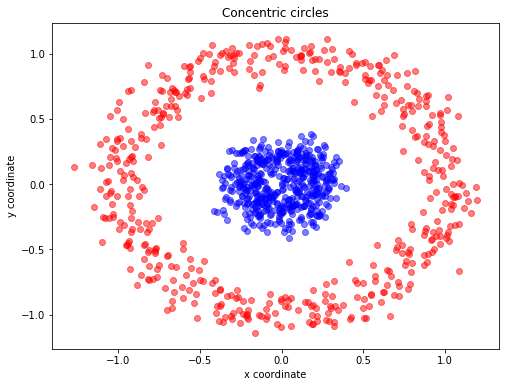

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, 
                    factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

#### Linear PCA on Concentric Circles

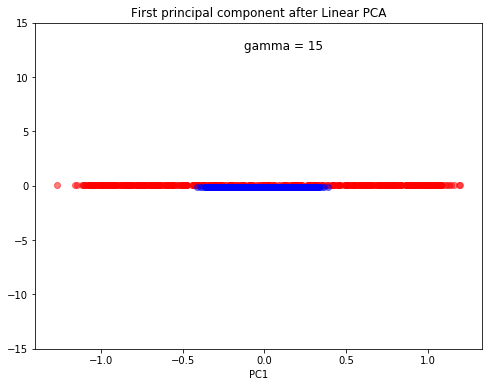

In [5]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-0.125, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

Again, the results obtained via the linear PCA approach does not produce a subspace where the 2 classes are linearly well separated.

#### Gaussian RBF kernel PCA on concentric circles

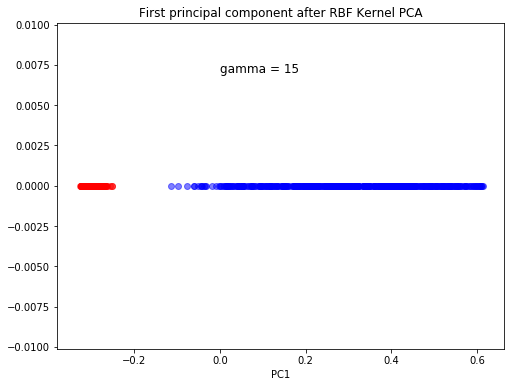

In [6]:
import warnings
warnings.simplefilter("ignore")

scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_pc = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(0.00, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

This 1-dimensional subspace obtained via Gaussian RBF kernel PCA looks much better in terms of linear class separation.

#### Swiss roll

Unrolling the Swiss roll is a more challenging task than the previous examples. 

Use the `make_swiss_roll` function to create a 3-dimensional Swiss roll.


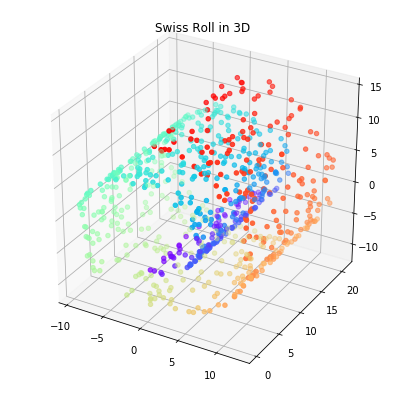

In [7]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()


#### Linear PCA on Swiss Roll

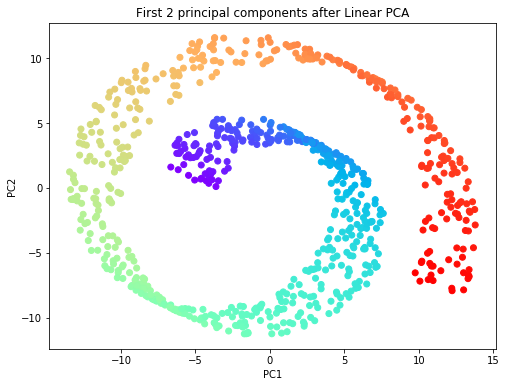

In [8]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

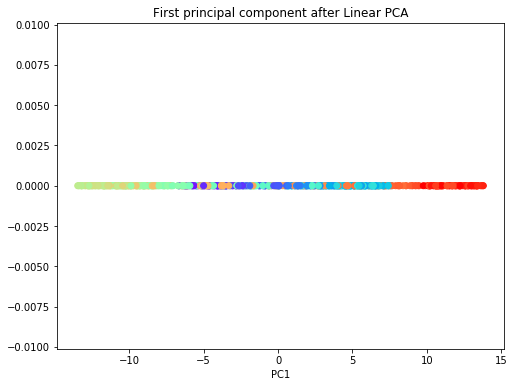

In [9]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

#### Gaussian RBF kernel PCA on Swiss Roll

Did not find a good parameter for $\gamma$ for the Gaussian RBF kernel for good linear separation of this data. 

Please try to do better.


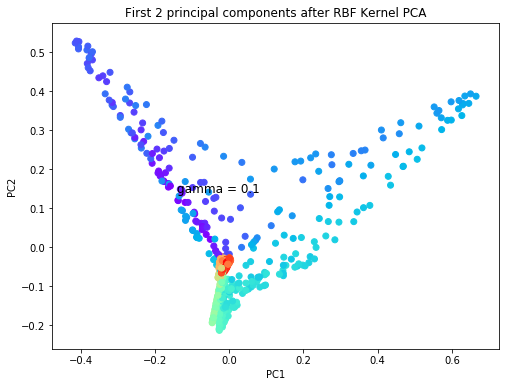

In [10]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_pc = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

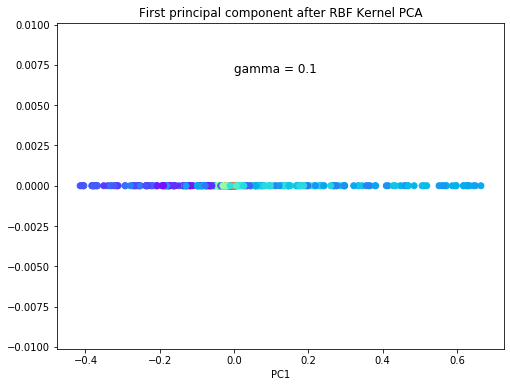

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.text(-0.00, 0.007, 'gamma = 0.1', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

In [0]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=100)
X_kpca = kpca.fit_transform(X)

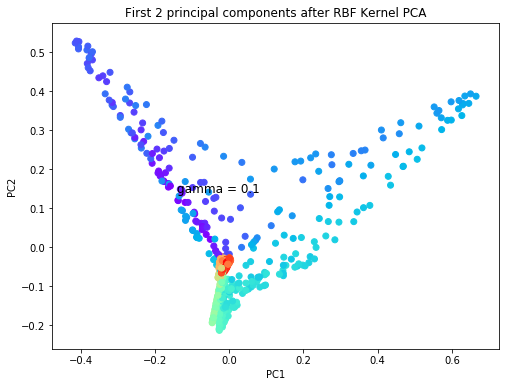

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

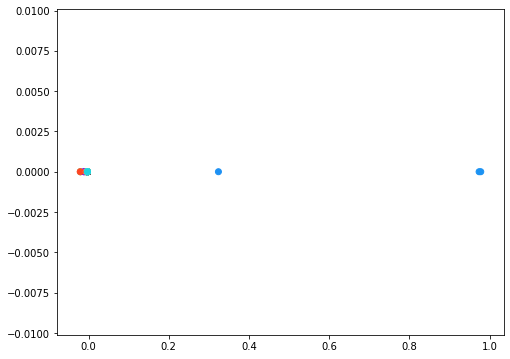

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(X_kpca[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)


### Assignment: Non-linear dimensionality reduction with kernel-PCA 

One place manifold learning is often used is in understanding the relationship between high-dimensional data points. A common case of high-dimensional data is images.

The brightness of each pixel in each image defines the coordinate in that dimension.

Data Set Information: This dataset is made up of 1797 8x8 images. Each image is of a handwritten digit. In order to utilize an 8x8 figure we need to first transform it into a feature vector with length 64.

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html 

Using the notebook (DimensionalityReduction_53_1_nonlinear_kpca.ipynb):

1) Load the the digits data with Scikit-Learn 

2) Fit PCA to 64-components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

3) Identify the number of components required for ~90 explained variance (only for PCA).

4) List the top 2 components, generate a color-coded scatter plot for the first two components.

5) Repeat steps 2 and 4 using Kernel-PCA with RBF, and Kernel-PCA with Poly kernels. For your kernel-PCA experiments try to identify the optimal value of gamma. 

6) Record your observations and identify your top performing model.


In [31]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

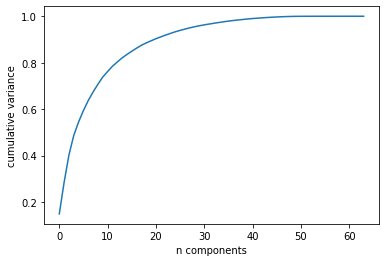

In [34]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(64).fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [17]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

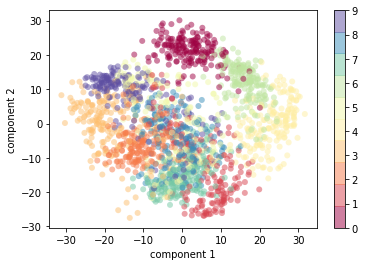

In [18]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful. We can compute an Isomap embedding on these faces using the same pattern shown before:

#### Apply `KernelPCA`

1) Instanciate a `KernelPCA` object with `n_components`=2, a `poly` kernel, and experimenet with `gamma`.

2) Fit your kernel to `digits.data`

3) Print out the shape of the transformed data

4) Experiment with your hyperparameters, `n_components`, kernel function and values of `gamma`. Identify your optimal hyperparameters.

In [19]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='poly', gamma=15)
X_kpca = kpca.fit_transform(digits.data)
X_kpca.shape

(1797, 2)

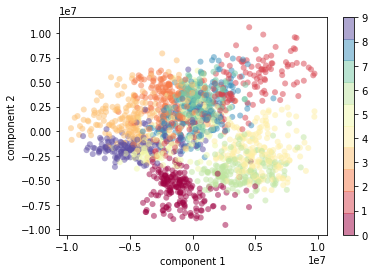

In [20]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [21]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=9, kernel='poly', gamma=3)
X_kpca = kpca.fit_transform(digits.data)
X_kpca.shape

(1797, 9)

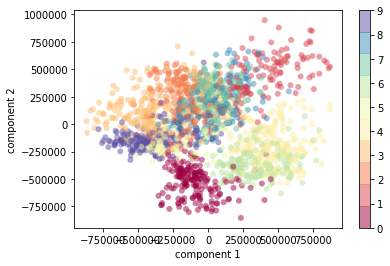

In [22]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [23]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=6, kernel='poly', gamma=40)
X_kpca = kpca.fit_transform(digits.data)
X_kpca.shape

(1797, 6)

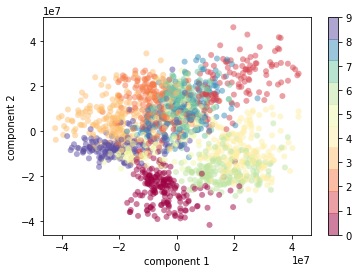

In [24]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [29]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=3, kernel='poly', gamma=0.1)
X_kpca = kpca.fit_transform(digits.data)
X_kpca.shape

(1797, 3)

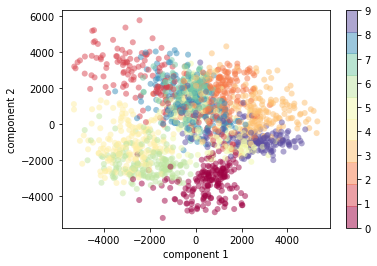

In [30]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [74]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='poly', gamma=0.1)
X_kpca = kpca.fit_transform(digits.data)
X_kpca.shape

(1797, 2)

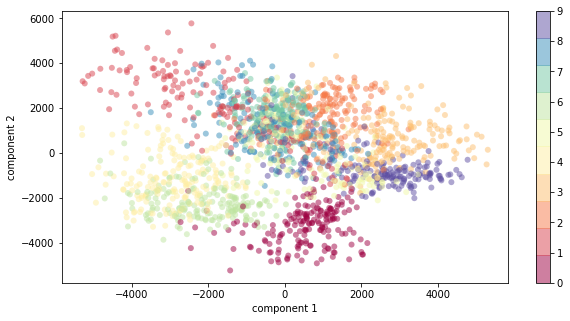

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();